In [1]:
!pwd
!ls

/Users/svenjalueg/Analytical Tools and the Study of the Bible Code
Assignment 07 Text-Fabric Svenja Lueg.ipynb
BJD Excel.xlsx
BJD extended.xlsx
Distribution <LJD.ipynb
Distribution BJD.ipynb
TF1.ipynb
bjd.csv
~$BJD Excel.xlsx
~$BJD extended.xlsx


In [2]:
import sys, collections, os
import pprint as pp
import pandas as pd
import numpy as np
from enum import Enum, IntEnum
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tf.app import use

A = use('ETCBC/bhsa:hot', hoist=globals())

**Locating corpus resources ...**

rate limit is 60 requests per hour, with 60 left for this hour
To increase the rate,see https://annotation.github.io/text-fabric/tf/advanced/repo.html#github
	connecting to online GitHub repo ETCBC/bhsa ... connected


Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [4]:
al_jd_dict = {}

for w in F.otype.s('word'):
    if F.lex.v(w) == 'JD/' and F.lex.v(w-1) == '<L':
        
        bo, ch, ve = T.sectionFromNode(w)
        
        sentence = L.u(w, 'sentence')[0]
        sentence_hebr = T.text(sentence, ftm="text-trans-plain")
        sentence_tl = T.text(sentence, fmt="text-trans-plain")
        
        clause = L.u(w, 'clause')[0]
        clause_hebr = T.text(clause, ftm="text-trans-plain")
        clause_tl = T.text(clause, fmt="text-trans-plain")
        
        phrase = L.u(w, 'phrase')[0]
        function = F.function.v(phrase)
        subj = 'NA'
        objc = 'NA'
        verb = 'nominal clause'
        tense = 'NA'
        stem = 'NA'
        predicate_type = 'NA'
        
        #checking potential modifications for bjd:
        #(1)pronominal suffix,
        #(2) noun or noun phrase in the absolute state following bjd in the absolute state, or
        #(3) adjective or modifying participle
        
        modifier_al_jd = 'NA'
        ps = F.prs_ps.v(w)
        nu = F.prs_nu.v(w)
        gn = F.prs_gn.v(w)
                        
        if ps in {'NA', 'unknown'}:
            ps = ''
        if nu in {'NA', 'unknown'}:
            nu = ''
        if gn in {'NA', 'unknown'}:
            gn = ''
        modifier_al_jd = ps+nu+gn
        
        if modifier_al_jd == '':
            modifier_al_jd = 'NA'
            if F.st.v(w) == 'c' and F.st.v(w+1) == 'a':
                modifier_al_jd = T.text((w+1), fmt="text-trans-plain")
            elif F.st.v(w) == 'c':
                modifier_al_jd = T.text(phrase, fmt="text-trans-plain")
            elif F.sp.v(w+1) == 'adjv':
                modifier_al_jd = T.text((w+1), fmt="text-trans-plain")
            elif F.vt.v(w+1) in {'ptca', 'ptcp'}:
                modifier_al_jd = T.text((w+1), fmt="text-trans-plain")
        
        phrases = L.d(clause, 'phrase')
       
        for phr in phrases:
            if F.function.v(phr) in {'Pred', 'PreC'}:
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreO':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        
                        ps = F.prs_ps.v(word)
                        nu = F.prs_nu.v(word)
                        gn = F.prs_gn.v(word)
                        
                        if ps in {'NA', 'unknown'}:
                            ps = ''
                        if nu in {'NA', 'unknown'}:
                            nu = ''
                        if gn in {'NA', 'unknown'}:
                            gn = ''
                        objc = ps+nu+gn
                        if objc == '':
                            objc = 'NA'
                            
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreS':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        subj = F.prs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'Objc':
                objc = T.text(phr, fmt="text-trans-plain")
            elif F.function.v(phr) == 'Subj':
                subj = T.text(phr, fmt="text-trans-plain")
            else:
                continue
        
        if subj == 'NA':
            for phr in phrases:
                if F.function.v(phr) in {'Pred', 'PreC', 'PreO', 'PreS'}:
                    if F.function.v(phr) == 'PreS':
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.prs_ps.v(word)
                                nu = F.prs_nu.v(word)
                                gn = F.prs_gn.v(word)
                    else:
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.ps.v(word)
                                nu = F.nu.v(word)
                                gn = F.gn.v(word)
                
                    if ps in {'NA', 'unknown'}:
                        ps = ''
                    if nu in {'NA', 'unknown'}:
                        nu = ''
                    if gn in {'NA', 'unknown'}:
                        gn = ''
                    subj = ps+nu+gn
                    if subj == '':
                        subj = 'NA'
                else:
                    continue
        
        info = [w, bo, ch, ve,
                sentence_hebr, sentence_tl, clause_hebr, clause_tl,
                verb, tense, stem, predicate_type,
                function, subj, objc, modifier_al_jd
               ]
        
        al_jd_dict[w] = info

In [6]:
header = [
    'slot', 'book', 'chapter', 'verse',
    'sentence_hebr', 'sentence_tl', 'clause_hebr', 'clause_tl',
    'verb', 'tense', 'stem', 'predicate_type',
    'function_bjd', 'subject', 'object', 'modifier_al_jd'
]

al_jd_df = pd.DataFrame(al_jd_dict).T
al_jd_df.columns = header
print(al_jd_df.shape)
print(al_jd_df.head(10))

(102, 16)
        slot     book chapter verse   
11487  11487  Genesis      24    18  \
11561  11561  Genesis      24    22   
11683  11683  Genesis      24    30   
12054  12054  Genesis      24    47   
13899  13899  Genesis      27    16   
21378  21378  Genesis      38    28   
21410  21410  Genesis      38    30   
23106  23106  Genesis      41    42   
23111  23111  Genesis      41    42   
24105  24105  Genesis      42    37   

                                           sentence_hebr   
11487                   וַתֹּ֧רֶד כַּדָּ֛הּ עַל־יָדָ֖הּ   \
11561  וַיִּקַּ֤ח הָאִישׁ֙ נֶ֣זֶם זָהָ֔ב בֶּ֖קַע מִשׁ...   
11683  וַיְהִ֣י׀ כִּרְאֹ֣ת אֶת־הַנֶּ֗זֶם וְֽאֶת־הַצְּ...   
12054  וָאָשִׂ֤ם הַנֶּ֨זֶם֙ עַל־אַפָּ֔הּ וְהַצְּמִידִ...   
13899  וְאֵ֗ת עֹרֹת֙ גְּדָיֵ֣י הָֽעִזִּ֔ים הִלְבִּ֖יש...   
21378           וַתִּקְשֹׁ֨ר עַל־יָדֹ֤ו שָׁנִי֙ לֵאמֹ֔ר    
21410  וְאַחַר֙ יָצָ֣א אָחִ֔יו אֲשֶׁ֥ר עַל־יָדֹ֖ו הַש...   
23106  וַיָּ֨סַר פַּרְעֹ֤ה אֶת־טַבַּעְתֹּו֙ מֵעַ֣ל יָ...   
23111               

In [13]:
al_jd_df.to_csv("<l_jd.csv", sep="\t", index=False)

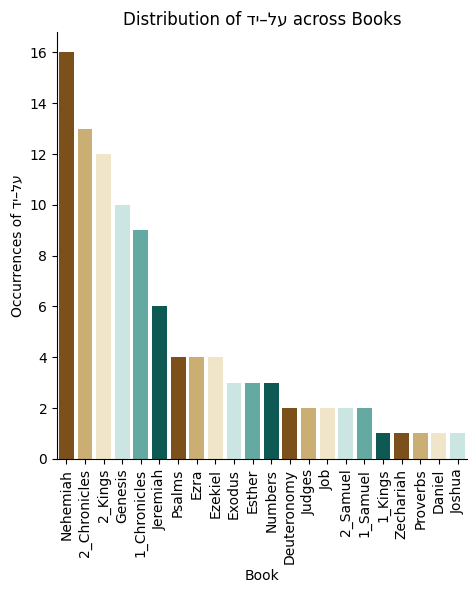

In [10]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=al_jd_df,
    x='book',
    y=None,
    kind = 'count',
    palette=colors,
    order = al_jd_df['book'].value_counts().index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Book', ylabel='Occurrences of די–לע', title = 'Distribution of די–לע across Books')

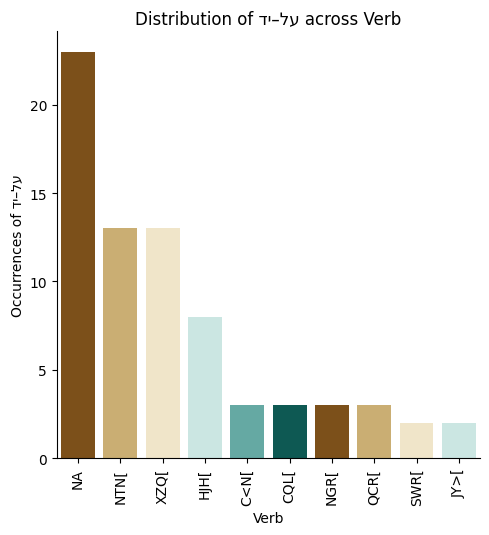

In [11]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=al_jd_df,
    x='verb',
    y=None,
    kind = 'count',
    palette=colors,
    order = al_jd_df['verb'].value_counts().iloc[:10].index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Verb', ylabel='Occurrences of די–לע', title = 'Distribution of די–לע across Verb')

In [12]:
number_of_occurrences = {}

for verb in al_jd_df['verb']:
    count = al_jd_df['verb'].value_counts()[verb]
    number_of_occurrences[verb] = count

number_of_occurrences = dict(sorted(number_of_occurrences.items(), key=lambda item: item[1]))
number_of_occurrences

{'JRD[': 1,
 'R>H[': 1,
 'LBC[': 1,
 'HLK[': 1,
 'JCB[': 1,
 'MSS[': 1,
 'NVC[': 1,
 'JYQ[': 1,
 'BW>[': 1,
 'FJM[': 1,
 'RDH=[': 1,
 'KCL[': 1,
 'KBD[': 1,
 'NXT[': 1,
 'R<H[': 1,
 'JRV[': 1,
 'QBY[': 1,
 'HLL[': 1,
 'NB>[': 1,
 'SWR[': 2,
 '<LH[': 2,
 '<MD[': 2,
 '<BR[': 2,
 'PQD[': 2,
 'JY>[': 2,
 'BNH[': 2,
 'QCR[': 3,
 'C<N[': 3,
 'NGR[': 3,
 'CQL[': 3,
 'HJH[': 8,
 'NTN[': 13,
 'XZQ[': 13,
 'NA': 23}